In [1]:
import hvplot.pandas
import pandas as pd
import json
import requests
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
url = "https://data.lacity.org/resource/2nrs-mtv8.json?"
limit = "&$limit=1000000"
response = requests.get(url,limit).json()

In [3]:
len(response)

932140

In [4]:
response

[{'dr_no': '190326475',
  'date_rptd': '2020-03-01T00:00:00.000',
  'date_occ': '2020-03-01T00:00:00.000',
  'time_occ': '2130',
  'area': '07',
  'area_name': 'Wilshire',
  'rpt_dist_no': '0784',
  'part_1_2': '1',
  'crm_cd': '510',
  'crm_cd_desc': 'VEHICLE - STOLEN',
  'vict_age': '0',
  'vict_sex': 'M',
  'vict_descent': 'O',
  'premis_cd': '101',
  'premis_desc': 'STREET',
  'status': 'AA',
  'status_desc': 'Adult Arrest',
  'crm_cd_1': '510',
  'crm_cd_2': '998',
  'location': '1900 S  LONGWOOD                     AV',
  'lat': '34.0375',
  'lon': '-118.3506'},
 {'dr_no': '200106753',
  'date_rptd': '2020-02-09T00:00:00.000',
  'date_occ': '2020-02-08T00:00:00.000',
  'time_occ': '1800',
  'area': '01',
  'area_name': 'Central',
  'rpt_dist_no': '0182',
  'part_1_2': '1',
  'crm_cd': '330',
  'crm_cd_desc': 'BURGLARY FROM VEHICLE',
  'mocodes': '1822 1402 0344',
  'vict_age': '47',
  'vict_sex': 'M',
  'vict_descent': 'O',
  'premis_cd': '128',
  'premis_desc': 'BUS STOP/LAYOVER

In [5]:
response_df = pd.DataFrame(response)

In [6]:
response_df.head()

,dr_no,date_rptd,date_occ,time_occ,area,area_name,rpt_dist_no,part_1_2,crm_cd,crm_cd_desc,...,crm_cd_2,location,lat,lon,mocodes,weapon_used_cd,weapon_desc,cross_street,crm_cd_3,crm_cd_4
0,190326475,2020-03-01T00:00:00.000,2020-03-01T00:00:00.000,2130,07,Wilshire,0784,1,510,VEHICLE - STOLEN,...,998,1900 S LONGWOOD AV,34.0375,-118.3506,NaN,NaN,NaN,NaN,NaN,NaN
1,200106753,2020-02-09T00:00:00.000,2020-02-08T00:00:00.000,1800,01,Central,0182,1,330,BURGLARY FROM VEHICLE,...,998,1000 S FLOWER ST,34.0444,-118.2628,1822 1402 0344,NaN,NaN,NaN,NaN,NaN
2,200320258,2020-11-11T00:00:00.000,2020-11-04T00:00:00.000,1700,03,Southwest,0356,1,480,BIKE - STOLEN,...,NaN,1400 W 37TH ST,34.021,-118.3002,0344 1251,NaN,NaN,NaN,NaN,NaN
3,200907217,2023-05-10T00:00:00.000,2020-03-10T00:00:00.000,2037,09,Van Nuys,0964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,NaN,14000 RIVERSIDE DR,34.1576,-118.4387,0325 1501,NaN,NaN,NaN,NaN,NaN
4,220614831,2022-08-18T00:00:00.000,2020-08-17T00:00:00.000,1200,06,Hollywood,0666,2,354,THEFT OF IDENTITY,...,NaN,1900 TRANSIENT,34.0944,-118.3277,1822 1501 0930 2004,NaN,NaN,NaN,NaN,NaN


In [7]:
#925720
response_df["dr_no"].count()

932140

In [8]:
response_df.columns

Index(['dr_no', 'date_rptd', 'date_occ', 'time_occ', 'area', 'area_name',
       'rpt_dist_no', 'part_1_2', 'crm_cd', 'crm_cd_desc', 'vict_age',
       'vict_sex', 'vict_descent', 'premis_cd', 'premis_desc', 'status',
       'status_desc', 'crm_cd_1', 'crm_cd_2', 'location', 'lat', 'lon',
       'mocodes', 'weapon_used_cd', 'weapon_desc', 'cross_street', 'crm_cd_3',
       'crm_cd_4'],
      dtype='object')

In [9]:
response_df["lon"] = response_df["lon"].astype(float)
response_df["lat"] = response_df["lat"].astype(float)

In [10]:
response_df.dtypes

dr_no              object
date_rptd          object
date_occ           object
time_occ           object
area               object
area_name          object
rpt_dist_no        object
part_1_2           object
crm_cd             object
crm_cd_desc        object
vict_age           object
vict_sex           object
vict_descent       object
premis_cd          object
premis_desc        object
status             object
status_desc        object
crm_cd_1           object
crm_cd_2           object
location           object
lat               float64
lon               float64
mocodes            object
weapon_used_cd     object
weapon_desc        object
cross_street       object
crm_cd_3           object
crm_cd_4           object
dtype: object

In [11]:
response_df_formatted = response_df.copy()

In [12]:
response_df_formatted=response_df_formatted.loc[response_df_formatted["lon"] != 0]

In [13]:
response_df_formatted.loc[response_df_formatted["lat"] == 0]

,dr_no,date_rptd,date_occ,time_occ,area,area_name,rpt_dist_no,part_1_2,crm_cd,crm_cd_desc,...,crm_cd_2,location,lat,lon,mocodes,weapon_used_cd,weapon_desc,cross_street,crm_cd_3,crm_cd_4


In [14]:
response_df_formatted['Year'] = pd.to_datetime(response_df_formatted['date_occ']).dt.strftime('%Y')
response_df_formatted = response_df_formatted.drop(['date_occ'], axis=1)

#year = year of occurrence

In [15]:
pd.set_option('display.max_columns', None)

response_df_formatted.head(10)

,dr_no,date_rptd,time_occ,area,area_name,rpt_dist_no,part_1_2,crm_cd,crm_cd_desc,vict_age,vict_sex,vict_descent,premis_cd,premis_desc,status,status_desc,crm_cd_1,crm_cd_2,location,lat,lon,mocodes,weapon_used_cd,weapon_desc,cross_street,crm_cd_3,crm_cd_4,Year
0,190326475,2020-03-01T00:00:00.000,2130,07,Wilshire,0784,1,510,VEHICLE - STOLEN,0,M,O,101,STREET,AA,Adult Arrest,510,998,1900 S LONGWOOD AV,34.0375,-118.3506,NaN,NaN,NaN,NaN,NaN,NaN,2020
1,200106753,2020-02-09T00:00:00.000,1800,01,Central,0182,1,330,BURGLARY FROM VEHICLE,47,M,O,128,BUS STOP/LAYOVER (ALSO QUERY 124),IC,Invest Cont,330,998,1000 S FLOWER ST,34.0444,-118.2628,1822 1402 0344,NaN,NaN,NaN,NaN,NaN,2020
2,200320258,2020-11-11T00:00:00.000,1700,03,Southwest,0356,1,480,BIKE - STOLEN,19,X,X,502,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,Invest Cont,480,NaN,1400 W 37TH ST,34.0210,-118.3002,0344 1251,NaN,NaN,NaN,NaN,NaN,2020
3,200907217,2023-05-10T00:00:00.000,2037,09,Van Nuys,0964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19,M,O,405,CLOTHING STORE,IC,Invest Cont,343,NaN,14000 RIVERSIDE DR,34.1576,-118.4387,0325 1501,NaN,NaN,NaN,NaN,NaN,2020
4,220614831,2022-08-18T00:00:00.000,1200,06,Hollywood,0666,2,354,THEFT OF IDENTITY,28,M,H,102,SIDEWALK,IC,Invest Cont,354,NaN,1900 TRANSIENT,34.0944,-118.3277,1822 1501 0930 2004,NaN,NaN,NaN,NaN,NaN,2020
5,231808869,2023-04-04T00:00:00.000,2300,18,Southeast,1826,2,354,THEFT OF IDENTITY,41,M,H,501,SINGLE FAMILY DWELLING,IC,Invest Cont,354,NaN,9900 COMPTON AV,33.9467,-118.2463,1822 0100 0930 0929,NaN,NaN,NaN,NaN,NaN,2020
6,230110144,2023-04-04T00:00:00.000,0900,01,Central,0182,2,354,THEFT OF IDENTITY,25,M,H,502,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,Invest Cont,354,NaN,1100 S GRAND AV,34.0415,-118.2620,0930 0929,NaN,NaN,NaN,NaN,NaN,2020
7,220314085,2022-07-22T00:00:00.000,1110,03,Southwest,0303,2,354,THEFT OF IDENTITY,27,F,B,248,CELL PHONE STORE,IC,Invest Cont,354,NaN,2500 S SYCAMORE AV,34.0335,-118.3537,0100,NaN,NaN,NaN,NaN,NaN,2020
8,231309864,2023-04-28T00:00:00.000,1400,13,Newton,1375,2,354,THEFT OF IDENTITY,24,F,B,750,CYBERSPACE,IC,Invest Cont,354,NaN,1300 E 57TH ST,33.9911,-118.2521,0100,NaN,NaN,NaN,NaN,NaN,2020
9,211904005,2020-12-31T00:00:00.000,1220,19,Mission,1974,2,624,BATTERY - SIMPLE ASSAULT,26,M,H,502,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,Invest Cont,624,NaN,9000 CEDROS AV,34.2336,-118.4535,0416,400,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",NaN,NaN,NaN,2020


In [16]:
response_df_formatted.count()

dr_no             929876
date_rptd         929876
time_occ          929876
area              929876
area_name         929876
rpt_dist_no       929876
part_1_2          929876
crm_cd            929876
crm_cd_desc       929876
vict_age          929876
vict_sex          805758
vict_descent      805748
premis_cd         929866
premis_desc       929314
status            929876
status_desc       929876
crm_cd_1          929865
crm_cd_2           67371
location          929876
lat               929876
lon               929876
mocodes           799400
weapon_used_cd    320506
weapon_desc       320506
cross_street      145598
crm_cd_3            2265
crm_cd_4              64
Year              929876
dtype: int64

In [17]:
map_plot_0 = response_df_formatted.hvplot.points(
    "lon",
    "lat",
    geo = True,
    tiles = "OSM",
    frame_width = 800,
    frame_height = 600,
    color="Year",
    title = "Crime by Coordinates",
    alpha = 0.5
)

c:\Users\PC\anaconda3\envs\inclassfeb2024\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


In [18]:
# map_plot_0

In [19]:
y_value = response_df_formatted.groupby(["Year"]).count()


In [20]:
y_value.reset_index(inplace=True)

<Axes: xlabel='Year'>

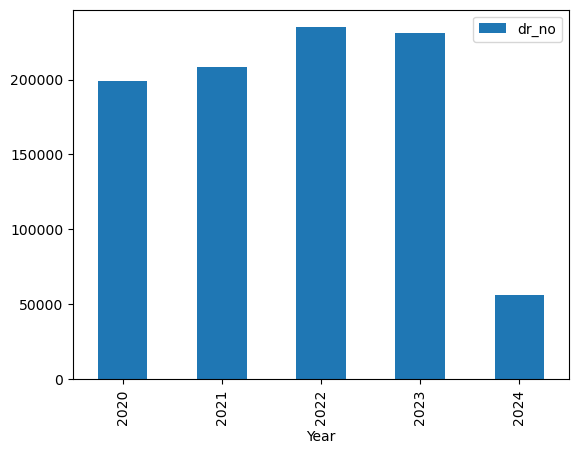

In [21]:
y_value.plot(kind="bar",x="Year",y="dr_no")

In [22]:
response_df_formatted.columns

Index(['dr_no', 'date_rptd', 'time_occ', 'area', 'area_name', 'rpt_dist_no',
       'part_1_2', 'crm_cd', 'crm_cd_desc', 'vict_age', 'vict_sex',
       'vict_descent', 'premis_cd', 'premis_desc', 'status', 'status_desc',
       'crm_cd_1', 'crm_cd_2', 'location', 'lat', 'lon', 'mocodes',
       'weapon_used_cd', 'weapon_desc', 'cross_street', 'crm_cd_3', 'crm_cd_4',
       'Year'],
      dtype='object')

In [23]:
crime_code_df=response_df_formatted[["crm_cd_desc","crm_cd","crm_cd_1","crm_cd_2","crm_cd_3","crm_cd_4","Year","area_name"]]
crime_code_df.describe()

,crm_cd_desc,crm_cd,crm_cd_1,crm_cd_2,crm_cd_3,crm_cd_4,Year,area_name
count,929876,929876,929865,67371,2265,64,929876,929876
unique,139,139,141,126,37,6,5,21
top,VEHICLE - STOLEN,510,510,998,998,998,2022,Central
freq,100159,100159,100141,53823,1999,56,234910,62939


In [24]:
crime_code_df_area=crime_code_df.groupby(["area_name"]).count()
crime_code_df_year=crime_code_df.groupby(["Year"]).count()
crime_code_df_desc=crime_code_df.groupby(["crm_cd_desc"]).size()
crime_code_df_desc_1=crime_code_df.groupby(["crm_cd_desc"]).count()
crime_code_df_cd=crime_code_df.groupby(["crm_cd","crm_cd_desc"]).count()

In [25]:
response_df_formatted["crm_cd_desc"].value_counts()

crm_cd_desc
VEHICLE - STOLEN                                      100159
BATTERY - SIMPLE ASSAULT                               73403
THEFT OF IDENTITY                                      57514
BURGLARY FROM VEHICLE                                  57482
BURGLARY                                               57000
                                                       ...  
THEFT, COIN MACHINE - ATTEMPT                              6
FIREARMS EMERGENCY PROTECTIVE ORDER (FIREARMS EPO)         5
DISHONEST EMPLOYEE ATTEMPTED THEFT                         4
FIREARMS RESTRAINING ORDER (FIREARMS RO)                   4
TRAIN WRECKING                                             1
Name: count, Length: 139, dtype: int64

In [26]:
# crime_code_df_desc.sort_values(ascending=False,inplace=True)
# top_10_crimes=crime_code_df_desc.head(10)
# Last_10_crime=crime_code_df_desc.tail(10)


<Axes: xlabel='crm_cd_desc'>

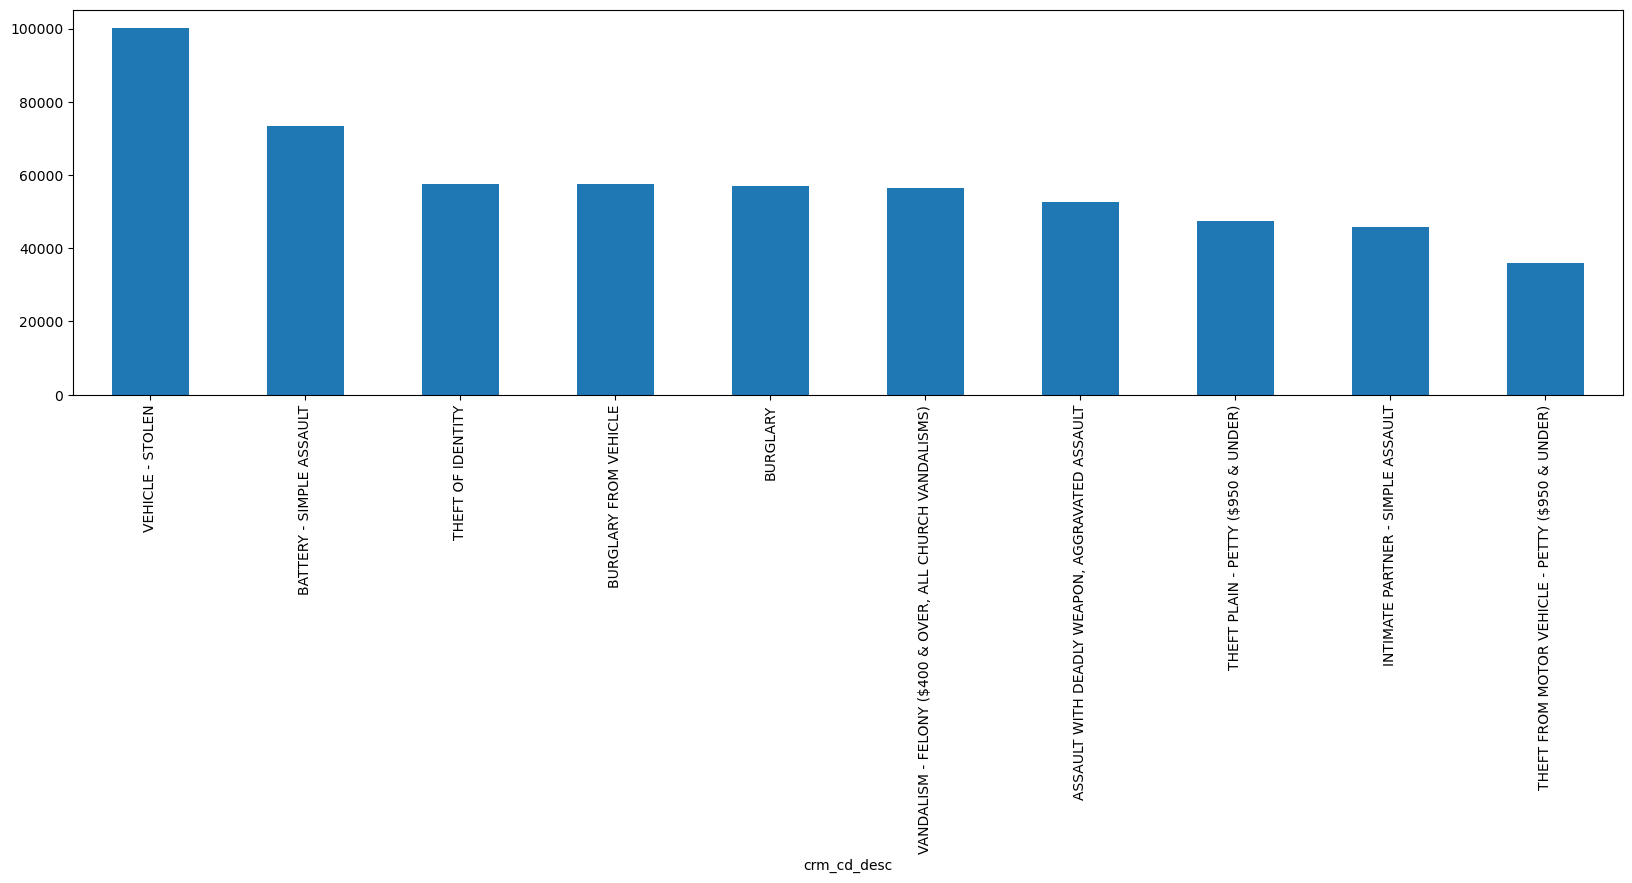

In [27]:
#top 10 crimes committed
crime_code_df_desc.sort_values(ascending=False).head(10).plot(kind="bar",figsize=(20,5))

<Axes: xlabel='crm_cd_desc'>

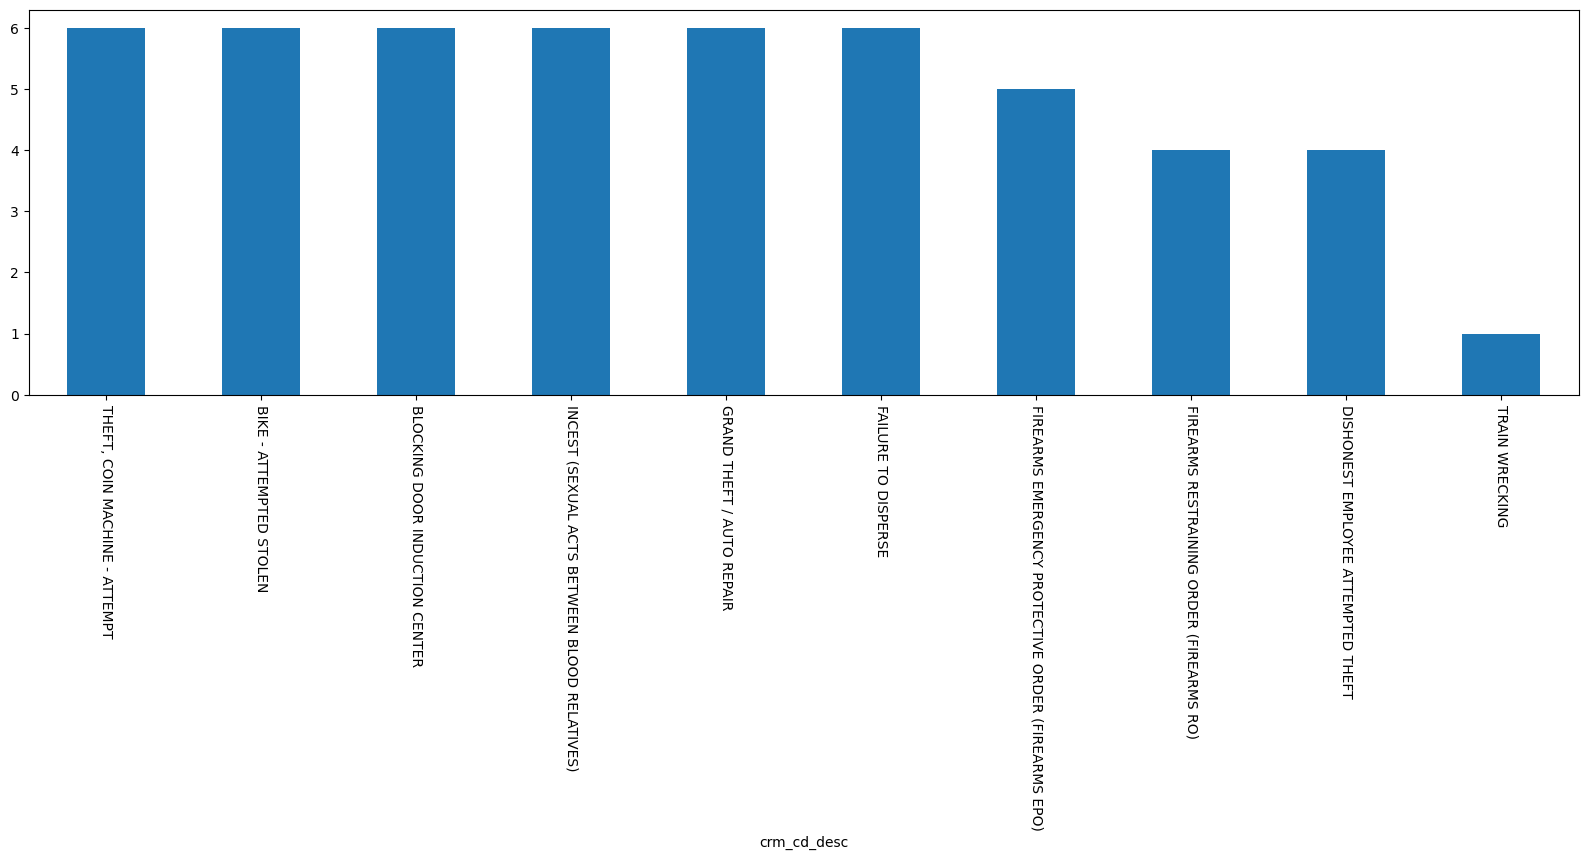

In [28]:
#Least 10 crimes committed

crime_code_df_desc.sort_values(ascending=False).tail(10).plot(kind="bar",figsize=(20,5),rot=-90)

<Axes: xlabel='area_name'>

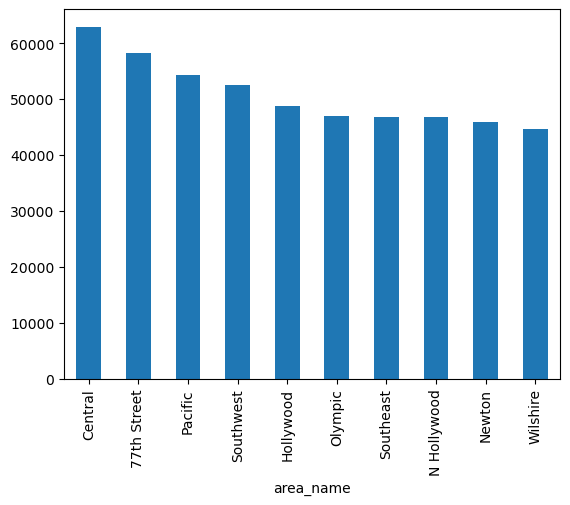

In [29]:
# crime_code_df_area.plot(kind="bar",y="crm_cd_1")
crime_code_df_area["crm_cd_desc"].sort_values(ascending=False).head(10).plot(kind="bar")


In [30]:
crime_code_df_desc_1


,crm_cd,crm_cd_1,crm_cd_2,crm_cd_3,crm_cd_4,Year,area_name
crm_cd_desc,,,,,,,
ARSON,2411,2411,377,5,0,2411,2411
ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER,1060,1060,232,0,0,1060,1060
"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",52656,52656,12409,252,5,52656,52656
ATTEMPTED ROBBERY,4769,4769,800,30,0,4769,4769
BATTERY - SIMPLE ASSAULT,73403,73403,1906,30,5,73403,73403
...,...,...,...,...,...,...,...
"VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, BIKES, ETC)",2139,2139,34,0,0,2139,2139
VIOLATION OF COURT ORDER,6234,6234,126,0,0,6234,6234
VIOLATION OF RESTRAINING ORDER,11477,11477,331,0,0,11477,11477


In [31]:
crime_code_df_desc

crm_cd_desc
ARSON                                                        2411
ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER                 1060
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT              52656
ATTEMPTED ROBBERY                                            4769
BATTERY - SIMPLE ASSAULT                                    73403
                                                            ...  
VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, BIKES, ETC)     2139
VIOLATION OF COURT ORDER                                     6234
VIOLATION OF RESTRAINING ORDER                              11477
VIOLATION OF TEMPORARY RESTRAINING ORDER                      903
WEAPONS POSSESSION/BOMBING                                     41
Length: 139, dtype: int64

In [32]:
response_df_formatted.groupby(["part_1_2"]).size()

part_1_2
1    549072
2    380804
dtype: int64

In [33]:
response_df_formatted.head(10)

,dr_no,date_rptd,time_occ,area,area_name,rpt_dist_no,part_1_2,crm_cd,crm_cd_desc,vict_age,vict_sex,vict_descent,premis_cd,premis_desc,status,status_desc,crm_cd_1,crm_cd_2,location,lat,lon,mocodes,weapon_used_cd,weapon_desc,cross_street,crm_cd_3,crm_cd_4,Year
0,190326475,2020-03-01T00:00:00.000,2130,07,Wilshire,0784,1,510,VEHICLE - STOLEN,0,M,O,101,STREET,AA,Adult Arrest,510,998,1900 S LONGWOOD AV,34.0375,-118.3506,NaN,NaN,NaN,NaN,NaN,NaN,2020
1,200106753,2020-02-09T00:00:00.000,1800,01,Central,0182,1,330,BURGLARY FROM VEHICLE,47,M,O,128,BUS STOP/LAYOVER (ALSO QUERY 124),IC,Invest Cont,330,998,1000 S FLOWER ST,34.0444,-118.2628,1822 1402 0344,NaN,NaN,NaN,NaN,NaN,2020
2,200320258,2020-11-11T00:00:00.000,1700,03,Southwest,0356,1,480,BIKE - STOLEN,19,X,X,502,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,Invest Cont,480,NaN,1400 W 37TH ST,34.0210,-118.3002,0344 1251,NaN,NaN,NaN,NaN,NaN,2020
3,200907217,2023-05-10T00:00:00.000,2037,09,Van Nuys,0964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19,M,O,405,CLOTHING STORE,IC,Invest Cont,343,NaN,14000 RIVERSIDE DR,34.1576,-118.4387,0325 1501,NaN,NaN,NaN,NaN,NaN,2020
4,220614831,2022-08-18T00:00:00.000,1200,06,Hollywood,0666,2,354,THEFT OF IDENTITY,28,M,H,102,SIDEWALK,IC,Invest Cont,354,NaN,1900 TRANSIENT,34.0944,-118.3277,1822 1501 0930 2004,NaN,NaN,NaN,NaN,NaN,2020
5,231808869,2023-04-04T00:00:00.000,2300,18,Southeast,1826,2,354,THEFT OF IDENTITY,41,M,H,501,SINGLE FAMILY DWELLING,IC,Invest Cont,354,NaN,9900 COMPTON AV,33.9467,-118.2463,1822 0100 0930 0929,NaN,NaN,NaN,NaN,NaN,2020
6,230110144,2023-04-04T00:00:00.000,0900,01,Central,0182,2,354,THEFT OF IDENTITY,25,M,H,502,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,Invest Cont,354,NaN,1100 S GRAND AV,34.0415,-118.2620,0930 0929,NaN,NaN,NaN,NaN,NaN,2020
7,220314085,2022-07-22T00:00:00.000,1110,03,Southwest,0303,2,354,THEFT OF IDENTITY,27,F,B,248,CELL PHONE STORE,IC,Invest Cont,354,NaN,2500 S SYCAMORE AV,34.0335,-118.3537,0100,NaN,NaN,NaN,NaN,NaN,2020
8,231309864,2023-04-28T00:00:00.000,1400,13,Newton,1375,2,354,THEFT OF IDENTITY,24,F,B,750,CYBERSPACE,IC,Invest Cont,354,NaN,1300 E 57TH ST,33.9911,-118.2521,0100,NaN,NaN,NaN,NaN,NaN,2020
9,211904005,2020-12-31T00:00:00.000,1220,19,Mission,1974,2,624,BATTERY - SIMPLE ASSAULT,26,M,H,502,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,Invest Cont,624,NaN,9000 CEDROS AV,34.2336,-118.4535,0416,400,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",NaN,NaN,NaN,2020


In [34]:
response_df_formatted["weapon_desc"].value_counts()


weapon_desc
STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)    171504
UNKNOWN WEAPON/OTHER WEAPON                        34849
VERBAL THREAT                                      23485
HAND GUN                                           19802
SEMI-AUTOMATIC PISTOL                               7127
                                                   ...  
MAC-11 SEMIAUTOMATIC ASSAULT WEAPON                    3
HECKLER & KOCH 91 SEMIAUTOMATIC ASSAULT RIFLE          2
MAC-10 SEMIAUTOMATIC ASSAULT WEAPON                    2
M-14 SEMIAUTOMATIC ASSAULT RIFLE                       2
M1-1 SEMIAUTOMATIC ASSAULT RIFLE                       1
Name: count, Length: 79, dtype: int64

In [35]:
crime_code_df_desc.sort_values(ascending=False).head(50)

crm_cd_desc
VEHICLE - STOLEN                                            100159
BATTERY - SIMPLE ASSAULT                                     73403
THEFT OF IDENTITY                                            57514
BURGLARY FROM VEHICLE                                        57482
BURGLARY                                                     57000
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)      56465
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT               52656
THEFT PLAIN - PETTY ($950 & UNDER)                           47452
INTIMATE PARTNER - SIMPLE ASSAULT                            45942
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)              35967
THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)          33301
ROBBERY                                                      31676
THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD     31136
SHOPLIFTING - PETTY THEFT ($950 & UNDER)                     24611
VANDALISM - MISDEAMEANOR ($399 OR UNDER)          

Vaibhav Work Starts from Here

In [36]:
# threshold=Top_Crimes_LosAngeles.values.sum()*.06
# Top_Crimes_LosAngeles_Filtered=Top_Crimes_LosAngeles[Top_Crimes_LosAngeles[]]

# Top_Crimes_LosAngeles=Top_Crimes_LosAngeles.columns=['Column1', 'Column2']
Top_Crimes_LosAngeles.index

NameError: name 'Top_Crimes_LosAngeles' is not defined

In [ ]:
# Top 7 Crimes Committed in Los Angeles

threshold=.06*response_df_formatted.count()
Top_Crimes_LosAngeles=response_df_formatted["crm_cd_desc"].value_counts().sort_values(ascending=False).head(7)
# TOP 7 Crimes Committed represent 50% of all the total crimes committed in los angeles in the given period

#define data
plt.figure(figsize=(10,5))
data=Top_Crimes_LosAngeles.values
labels=Top_Crimes_LosAngeles.index


#define Seaborn color palette to use
colors = sns.color_palette('bright')[0:5]


# plt.pie(x=Top_Crimes_LosAngeles.values,labels=Top_Crimes_LosAngeles.index,autopct='%.0f%%')
plt.pie(x=data,labels=labels,colors=colors,autopct='%.0f%%')
plt.title("Top Crimes Committed in Los Angeles")
plt.show()


NameError: name 'response_df_formatted' is not defined

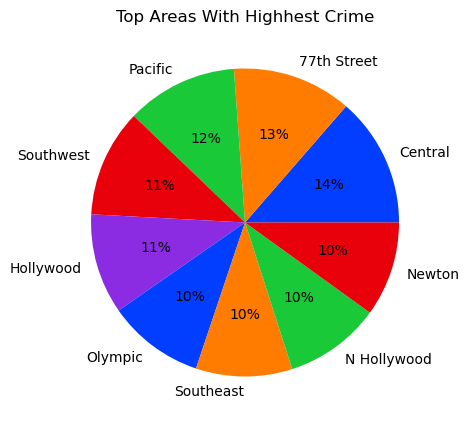

In [ ]:
Top_Area_LosAngeles=response_df_formatted["area_name"].value_counts().sort_values(ascending=False).head(9)
# Top 9 cities represnet 50% of all the total crimes committed in LosAngeles

#define data
plt.figure(figsize=(10,5))
data=Top_Area_LosAngeles.values
labels=Top_Area_LosAngeles.index


#define Seaborn color palette to use
colors = sns.color_palette('bright')[0:5]


# plt.pie(x=Top_Crimes_LosAngeles.values,labels=Top_Crimes_LosAngeles.index,autopct='%.0f%%')
plt.pie(x=data,labels=labels,colors=colors,autopct='%.0f%%')
plt.title("Top Areas With Highest Crime")
plt.show()


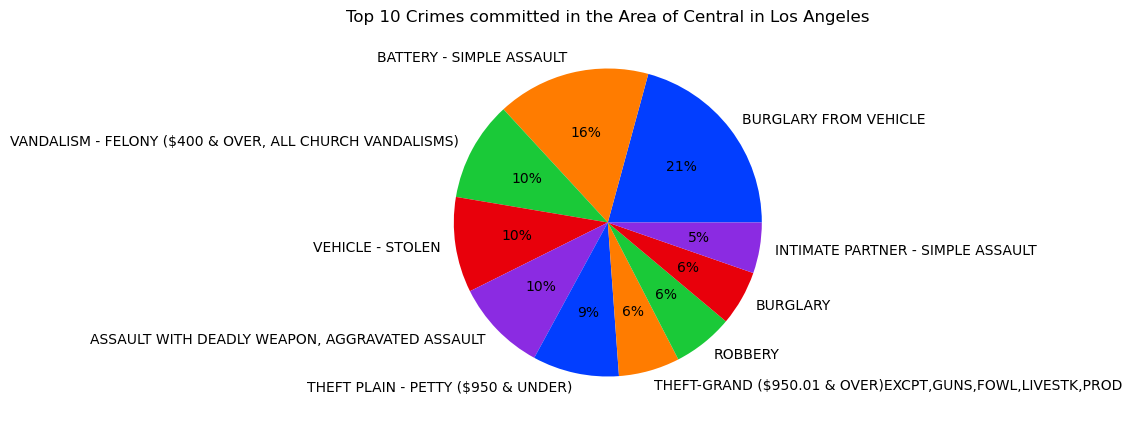

In [ ]:
All_Crimes_Comitted_in_Central=response_df_formatted[response_df_formatted["area_name"]=="Central"]["crm_cd_desc"]
# Count is 62658
All_Crimes_Comitted_in_Central_top_10=All_Crimes_Comitted_in_Central.value_counts().sort_values(ascending=False).head(10)


#define data
plt.figure(figsize=(10,5))
data=All_Crimes_Comitted_in_Central_top_10.values
labels=All_Crimes_Comitted_in_Central_top_10.index

# #define Seaborn color palette to use
colors = sns.color_palette('bright')[0:5]


plt.pie(x=data,labels=labels,colors=colors,autopct='%.0f%%')
plt.title("Top 10 Crimes committed in the Area of Central in Los Angeles")
plt.show()

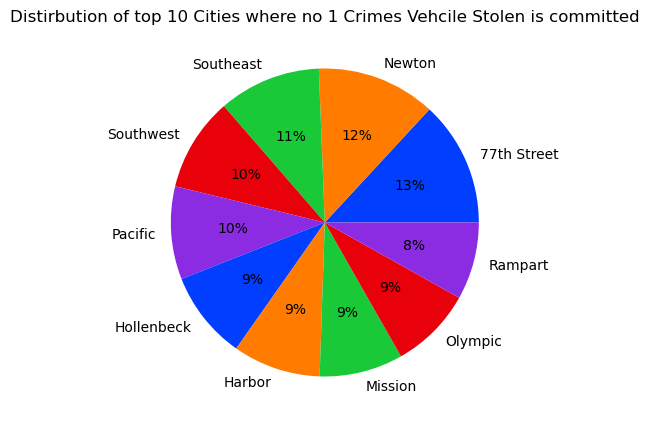

In [ ]:
All_Cities_Where_Vehicle_Stolen=response_df_formatted[response_df_formatted["crm_cd_desc"]=="VEHICLE - STOLEN"]["area_name"]
# Count is 62658
Top_Cities_Where_Vehicle_Stolen=All_Cities_Where_Vehicle_Stolen.value_counts().sort_values(ascending=False).head(10)


#define data
plt.figure(figsize=(10,5))
data=Top_Cities_Where_Vehicle_Stolen.values
labels=Top_Cities_Where_Vehicle_Stolen.index

# # #define Seaborn color palette to use
colors = sns.color_palette('bright')[0:5]


plt.pie(x=data,labels=labels,colors=colors,autopct='%.0f%%')
plt.title("Distirbution of top 10 Cities where no 1 Crimes Vehcile Stolen is committed")
plt.show()

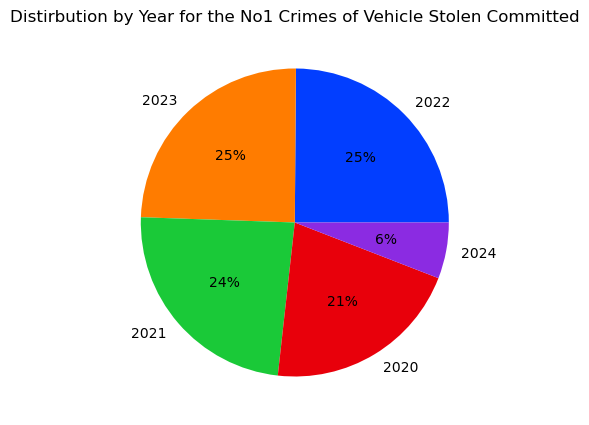

In [ ]:
# Ditribution by Year of Top1 Crime Committed
Distribtion_Year_of_Vehicle_Stolen=response_df_formatted[response_df_formatted["crm_cd_desc"]=="VEHICLE - STOLEN"]["Year"]
Year_Vehicles_Stoles=Distribtion_Year_of_Vehicle_Stolen.value_counts().sort_values(ascending=False)



#define data
plt.figure(figsize=(10,5))
data=Year_Vehicles_Stoles.values
labels=Year_Vehicles_Stoles.index

# # #define Seaborn color palette to use
colors = sns.color_palette('bright')[0:5]


plt.pie(x=data,labels=labels,colors=colors,autopct='%.0f%%')
plt.title("Distirbution by Year for the No1 Crimes of Vehicle Stolen Committed")
plt.show()


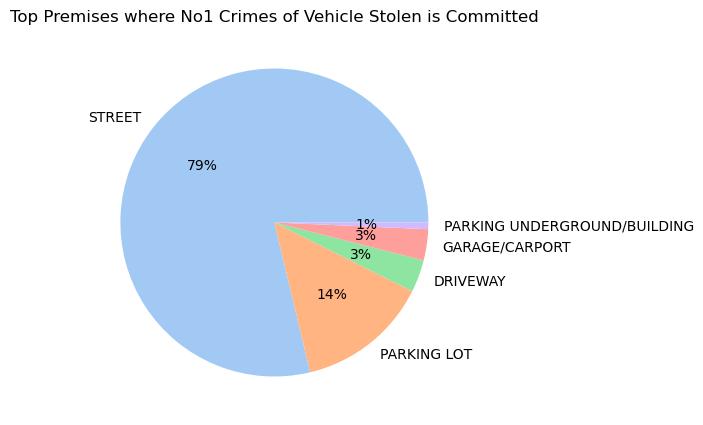

In [ ]:
# Ditribution by Year of Top1 Crime Committed
Premise_of_Vehicle_Stolen=response_df_formatted[response_df_formatted["crm_cd_desc"]=="VEHICLE - STOLEN"]["premis_desc"]
Top10_Premise_Vehicles_Stoles=Premise_of_Vehicle_Stolen.value_counts().sort_values(ascending=False).head(5)



#define data
plt.figure(figsize=(10,5))
data=Top10_Premise_Vehicles_Stoles.values
labels=Top10_Premise_Vehicles_Stoles.index

# # #define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]


plt.pie(x=data,labels=labels,colors=colors,autopct='%.0f%%')
plt.title("Top Premises where No1 Crimes of Vehicle Stolen is Committed")
plt.show()


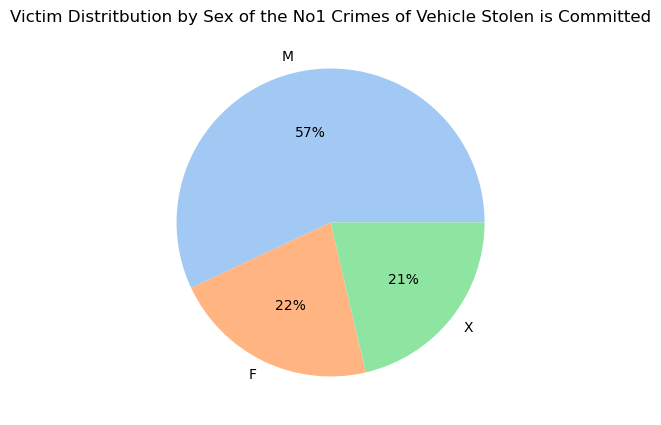

In [ ]:
# Ditribution by Year of Top1 Crime Committed
Victim_Sex_OF_Vehicle_Stolen=response_df_formatted[response_df_formatted["crm_cd_desc"]=="VEHICLE - STOLEN"]["vict_sex"]
Distribution_by_Sex_of_All_Victims_Vehcile_Stolen=Premise_of_Vehicle_Stolen.value_counts().sort_values(ascending=False).head(5)



#define data
plt.figure(figsize=(10,5))
data=Distribution_by_Sex_of_All_Victims_Vehcile_Stolen.values
labels=Distribution_by_Sex_of_All_Victims_Vehcile_Stolen.index

# # #define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]


plt.pie(x=data,labels=labels,colors=colors,autopct='%.0f%%')
plt.title("Victim Distritbution by Sex of the No1 Crimes of Vehicle Stolen is Committed")
plt.show()


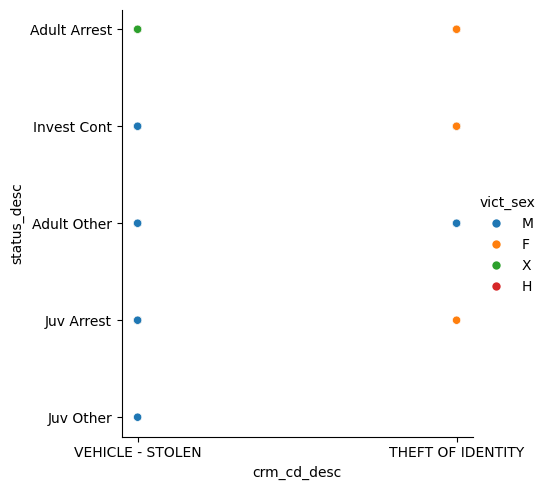

In [ ]:

Top_3_Crimes=response_df_formatted[response_df_formatted["crm_cd_desc"].isin(["VEHICLE - STOLEN","BATTERY - SIMPLE ASSAULT ","THEFT OF IDENTITY"])]
# response_df_formatted[response_df_formatted["crm_cd_desc"]=="VEHICLE - STOLEN"]["Year"]

sns.relplot(data=Top_3_Crimes, x="crm_cd_desc", y="status_desc", hue="vict_sex")


